In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn

from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

In [2]:
sbn.set_style("whitegrid")

figsize = (12, 6)

### data

In [3]:
n = 20
m = 6
random_state = 0
noise = 0.5
X, Y = make_regression(n_samples=n, n_features=m, random_state=random_state, noise=noise)

#### independent variable vs dependent variable

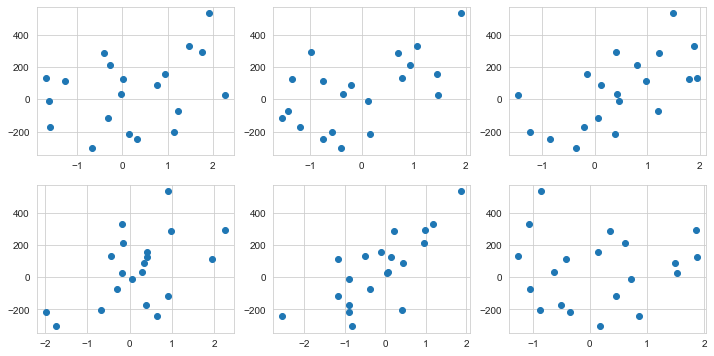

In [4]:
fig, axs = plt.subplots(2, 3, figsize=figsize)
axs[0, 0].scatter(X[:, 0], Y)
axs[0, 1].scatter(X[:, 1], Y)
axs[0, 2].scatter(X[:, 2], Y)
axs[1, 0].scatter(X[:, 3], Y)
axs[1, 1].scatter(X[:, 4], Y)
axs[1, 2].scatter(X[:, 5], Y)
plt.show()

#### independent variable vs indenpendent variable

In [5]:
df = pd.DataFrame(X, columns=["X_0", "X_1", "X_2", "X_3", "X_4", "X_5"])

In [6]:
corr = df.corr()

In [7]:
corr

,X_0,X_1,X_2,X_3,X_4,X_5
X_0,1.000000,0.292420,-0.190848,0.072106,0.552589,0.164320
X_1,0.292420,1.000000,0.118720,-0.158217,0.490268,-0.159519
X_2,-0.190848,0.118720,1.000000,0.166191,0.357661,-0.288054
X_3,0.072106,-0.158217,0.166191,1.000000,0.120069,0.305531
X_4,0.552589,0.490268,0.357661,0.120069,1.000000,-0.030526
X_5,0.164320,-0.159519,-0.288054,0.305531,-0.030526,1.000000


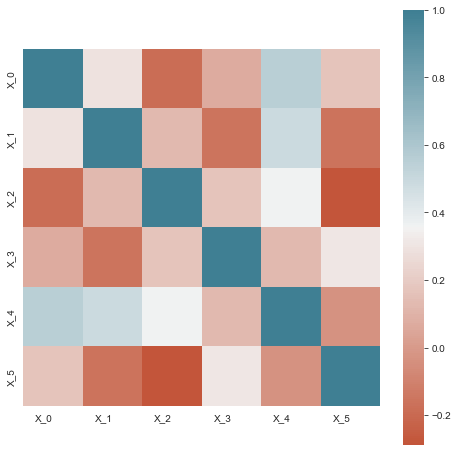

In [8]:
plt.figure(figsize=(8, 8))
ax = sbn.heatmap(corr, cmap=sbn.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right')
plt.show()

### one feature

In [9]:
X_4 = add_constant(X[:, 4])
model = OLS(Y, X_4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     24.89
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           9.51e-05
Time:                        13:55:30   Log-Likelihood:                -127.13
No. Observations:                  20   AIC:                             258.3
Df Residuals:                      18   BIC:                             260.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.4032     33.269      2.267      0.036       5.509     145.298
x1           166.3726     33.349      4.989      0.000      96.309     236.436
==============================================================================
Omnibus:                        2.497   Durbin-Watson:                   2.504
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.346
Skew:                          -0.630   Prob(JB):                        0.510
Kurtosis:                       3.165   Cond. No.                         1.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### adding more features

#### adding a highly correlated, lowly predictive feature
* gain: increase in SSM, R-squared
* cost: decrease in adjusted R-squared
    * decrease in stability of coefficient estimation
    * decrease in explaination by each feature
    * increase in overfitting

In [10]:
X_4_0 = add_constant(X[:, [0, 4]])
model = OLS(Y, X_4_0).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     12.45
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           0.000469
Time:                        13:55:30   Log-Likelihood:                -126.79
No. Observations:                  20   AIC:                             259.6
Df Residuals:                      17   BIC:                             262.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.3110     35.224      2.365      0.030       8.995     157.627
x1           -25.5559     33.519     -0.762      0.456     -96.275      45.164
x2           183.4298     40.486      4.531      0.000      98.011     268.849
==============================================================================
Omnibus:                        2.506   Durbin-Watson:                   2.424
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.510
Skew:                          -0.673   Prob(JB):                        0.470
Kurtosis:                       3.022   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### adding a linearly dependent feature
* gain: no increase in SSM, R-squared
* cost: no decrease in adjusted R-squared
    * decrease in stability of coefficient estimation
    * decrease in explaination by each feature
    * increase in overfitting

In [11]:
X_0_plus_4 = X[:, 0] + X[:, 4]
X_0_plus_4 = X_0_plus_4.reshape(n, -1)

X_4_0_0_plus_4 = np.hstack([X[:, [0, 4]], X_0_plus_4])

In [12]:
X_4_0_0_plus_4 = add_constant(X_4_0_0_plus_4)
model = OLS(Y, X_4_0_0_plus_4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     12.45
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           0.000469
Time:                        13:55:30   Log-Likelihood:                -126.79
No. Observations:                  20   AIC:                             259.6
Df Residuals:                      17   BIC:                             262.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.3110     35.224      2.365      0.030       8.995     157.627
x1           -78.1805     31.855     -2.454      0.025    -145.390     -10.971
x2           130.8052     34.448      3.797      0.001      58.127     203.483
x3            52.6246     11.846      4.443      0.000      27.632      77.617
==============================================================================
Omnibus:                        2.506   Durbin-Watson:                   2.424
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.510
Skew:                          -0.673   Prob(JB):                        0.470
Kurtosis:                       3.022   Cond. No.                     8.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""